In [5]:

import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [7]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, epochs=5)
# Save the model
#model.save('handwritten_cnn.model')
# Load the model
#model = tf.keras.models.load_model('handwritten_cnn.model')



Epoch 1/5


2023-10-01 16:00:12.906682: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 47s 25ms/step - loss: 0.1469 - accuracy: 0.9569
Epoch 2/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0500 - accuracy: 0.9849
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0330 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0210 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0149 - accuracy: 0.9951


In [9]:

loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


  1/313 [..............................] - ETA: 41s - loss: 0.2716 - accuracy: 0.9688

2023-10-01 16:04:12.897502: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step - loss: 0.0500 - accuracy: 0.9856
Test loss: 0.049950722604990005
Test accuracy: 0.9855999946594238


1/1 [==============================] - 0s 81ms/step
This digit is probably a 5


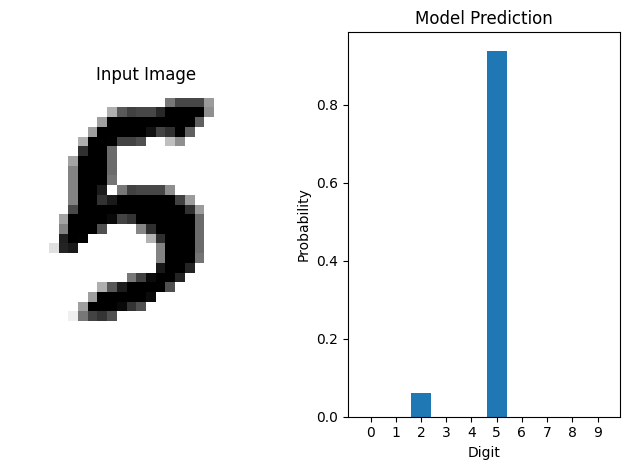

In [10]:

image_path = "./img/img.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img / 255.0 # Normalize pixel values
img = img.reshape(1, 28, 28, 1)

prediction = model.predict(img)
predicted_digit = np.argmax(prediction)
print(f"This digit is probably a {predicted_digit}")

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28), cmap='gray', vmin=0, vmax=1)
plt.title('Input Image')
plt.axis('off')
# Display the model's prediction probabilities
plt.subplot(1, 2, 2)
plt.bar(range(10), prediction[0])
plt.xticks(range(10))


plt.title('Model Prediction')
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()